# Comparison of Marker detection ability between 10X and C1HT

In [1]:
library(Seurat)
library(ggplot2)
library(magrittr)
library(data.table)
library(Matrix)
library(dplyr)
library(tibble)
library(RColorBrewer)
library(MAST)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:data.table’:

    between, first, last


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: SingleCellExperiment

Loading required package: SummarizedExperiment

Loading required package: MatrixGenerics

Loading required package: matrixStats


Attaching package: ‘matrixStats’


The following object is masked from ‘package:dplyr’:

    count



Attaching package: ‘MatrixGenerics’


The following objects are masked from ‘package:matrixStats’:

    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
    colCounts, colCummaxs, colCummins, colCumprods, colCumsums,
    colDiffs, colIQRDiffs, colIQRs, colLogSumExps, colMadDiffs,
    colMads, colMaxs, colMeans2, colMedians, colMins, colOrderStats,
    colProds, colQuantiles, colRanges, colRanks, colSdDiffs, colSds,
 

In [2]:
sessionInfo()

R version 4.0.3 (2020-10-10)
Platform: x86_64-apple-darwin17.0 (64-bit)
Running under: macOS Catalina 10.15.7

Matrix products: default
BLAS:   /Library/Frameworks/R.framework/Versions/4.0/Resources/lib/libRblas.dylib
LAPACK: /Library/Frameworks/R.framework/Versions/4.0/Resources/lib/libRlapack.dylib

locale:
[1] ja_JP.UTF-8/ja_JP.UTF-8/ja_JP.UTF-8/C/ja_JP.UTF-8/ja_JP.UTF-8

attached base packages:
[1] parallel  stats4    stats     graphics  grDevices utils     datasets 
[8] methods   base     

other attached packages:
 [1] MAST_1.16.0                 SingleCellExperiment_1.12.0
 [3] SummarizedExperiment_1.20.0 Biobase_2.50.0             
 [5] GenomicRanges_1.42.0        GenomeInfoDb_1.26.2        
 [7] IRanges_2.24.1              S4Vectors_0.28.1           
 [9] BiocGenerics_0.36.0         MatrixGenerics_1.2.0       
[11] matrixStats_0.57.0          RColorBrewer_1.1-2         
[13] tibble_3.0.5                dplyr_1.0.3                
[15] Matrix_1.3-2                data.table_1.1

## Cluster marker detection in each dataset

In [3]:
#loading integration data
seu_HQC <- readRDS(file = '../../data/seurat_object/all_integration/seu_Harmony_integrated.obj')

Warning message:
“Using `as.character()` on a quosure is deprecated as of rlang 0.3.0.
Please use `as_label()` or `as_name()` instead.
This warning is displayed once per session.”


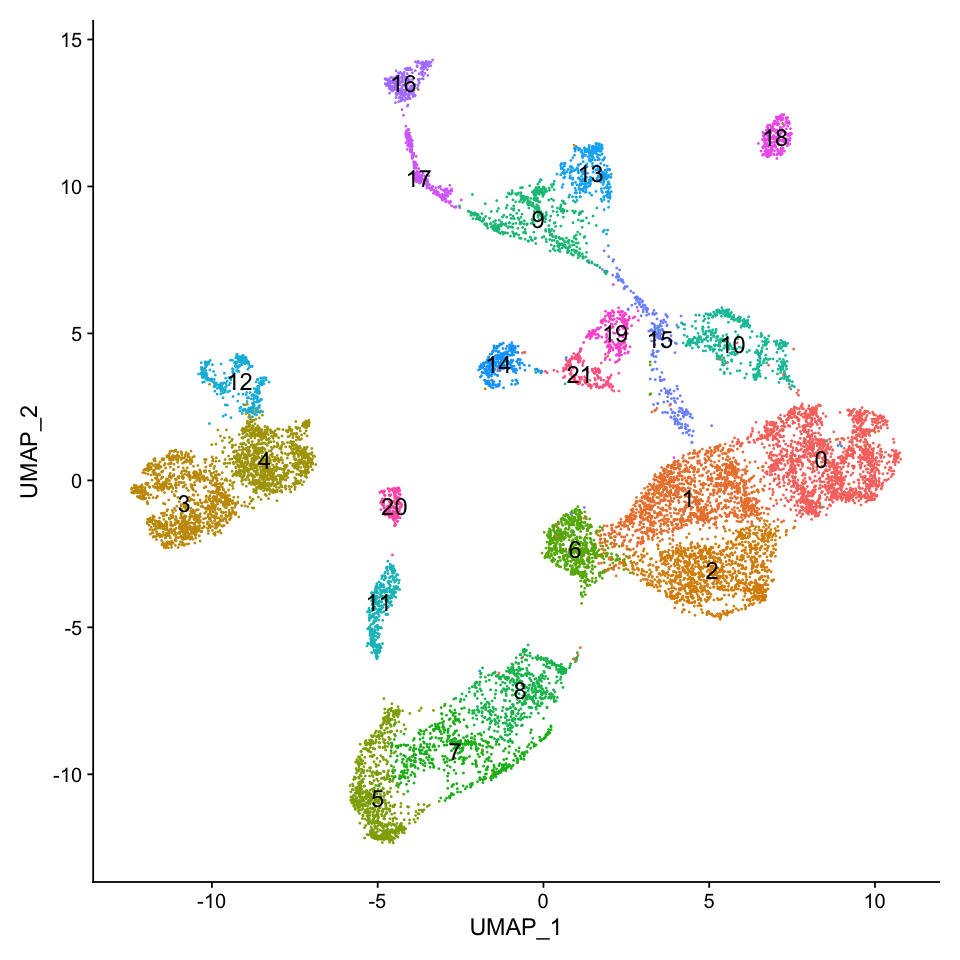

In [4]:
Idents(seu_HQC) <- 'seurat_clusters'
options(repr.plot.width=8, repr.plot.height=8)
DimPlot(seu_HQC, reduction = 'umap', label.size = 5,label = T) + NoLegend()

In [5]:
#Split data into original four datasets
obj.list <- SplitObject(seu_HQC, split.by = 'set')

In [6]:
PosFindAllMarkers <- function(seu){
    all.markers <- FindAllMarkers(object = seu, only.pos = T, method = 'MAST')
    return(all.markers)
}

In [7]:
#Cluster marker detection in each dataset
all.markers.list.orig <- lapply(X = obj.list, FUN = PosFindAllMarkers)

Calculating cluster 0

Calculating cluster 1

Calculating cluster 2

Calculating cluster 3

Calculating cluster 4

Calculating cluster 5

Calculating cluster 6

Calculating cluster 7

Calculating cluster 8

Calculating cluster 9

Calculating cluster 10

Calculating cluster 11

Calculating cluster 12

Calculating cluster 13

Calculating cluster 14

Calculating cluster 15

Calculating cluster 16

Calculating cluster 17

Calculating cluster 18

Calculating cluster 19

Calculating cluster 20

Calculating cluster 21

Calculating cluster 0

Calculating cluster 1

Calculating cluster 2

Calculating cluster 3

Calculating cluster 4

Calculating cluster 5

Calculating cluster 6

Calculating cluster 7

Calculating cluster 8

Calculating cluster 9

Calculating cluster 10

Calculating cluster 11

Calculating cluster 12

Calculating cluster 13

Calculating cluster 14

Calculating cluster 15

Calculating cluster 16

Calculating cluster 17

Calculating cluster 18

Calculating cluster 19

Calculating 

In [8]:
head(all.markers.list.orig[['Set 1']])

,p_val,avg_logFC,pct.1,pct.2,p_val_adj,cluster,gene
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
sca,4.173642e-60,1.681028,1.000,0.922,5.245433e-56,0,sca
ths,4.797664e-55,1.651074,1.000,0.734,6.029704e-51,0,ths
sad,2.341609e-53,1.518066,0.861,0.240,2.942934e-49,0,sad
SoxN,3.014286e-52,1.399357,1.000,0.948,3.788355e-48,0,SoxN
D,1.196724e-49,1.598947,0.992,0.636,1.504042e-45,0,D
CG17724-Kdm4B-seq,7.305140e-49,1.128138,1.000,0.982,9.181101e-45,0,CG17724-Kdm4B-seq


In [9]:
cluster.names <- unique(obj.list[['Set 1']]$seurat_clusters)
cluster.names

[1] 8  1  15 6  7  5  11 4  10 3  18 0  2  14 9  20 19 16 21 17 12 13
Levels: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21

In [10]:
write.csv(all.markers.list.orig[['Set 1']], file = './markers_Set1_considerng_multi.txt')
write.csv(all.markers.list.orig[['Set 2']], file = './markers_Set2_considerng_multi.txt')
write.csv(all.markers.list.orig[['Set 3']], file = './markers_Set3_considerng_multi.txt')
write.csv(all.markers.list.orig[['NK-data']], file = './markers_NK_considerng_multi.txt')

In [11]:
# Thresholding FWER < 0.05
n.clusters <- length(cluster.names)
FilterPvalAdj <- function(df){
    df <- df[df$p_val_adj * n.clusters < 0.01,]
    return(df)
    }
all.markers.list <- lapply(all.markers.list.orig, FUN = FilterPvalAdj)

In [12]:
#Genes detected as marker genes in at least one clusters
MarkersUnique <- function(df){
    gene.list <- unique(df$gene)
    return(gene.list)
}
markers.unique.list <- lapply(all.markers.list, FUN = MarkersUnique)

In [13]:
#Num of marker genes
lapply(markers.unique.list, FUN = length)

$`Set 3`
[1] 2532

$`Set 2`
[1] 2132

$`NK-data`
[1] 1389

$`Set 1`
[1] 1422

## Categorize marker genes
Marker genes detected in Set 2 or Set 1 categorize into 3 type.  
1. C1HT only (Genes detected as marker genes only in Set 1)
1. 10X only (Genes detected as marker genes only in Set 2)
1. common (Genes detected as marker genes in both of Set 1 and Set 2)

In [14]:
c1.only.markers <- setdiff(markers.unique.list[['Set 1']],markers.unique.list[['Set 2']])
tenx.only.markers <- setdiff(markers.unique.list[['Set 2']],markers.unique.list[['Set 1']])
common.markers <- intersect(markers.unique.list[['Set 1']],markers.unique.list[['Set 2']])

In [15]:
length(c1.only.markers)
length(tenx.only.markers)
length(common.markers)

[1] 331

[1] 1041

[1] 1091

## Calculate average expression of marker genes in Set 1
For each marker gene, the average expression in Set 1 was calculated among the cells which belong to the clusters in which the gene detected as marker. 

In [16]:
temp <- c()
temp.diff <- c()
df <- all.markers.list[['Set 1']]
for (g in c1.only.markers){
    ident <- df[df$gene == g, 'cluster']
    seu.temp <- subset(obj.list[['Set 1']], ident = ident)
    seu.temp$temp <- 'temp'
    Idents(seu.temp) <- 'temp'
    expr <- AverageExpression(seu.temp, features = g, verbose = F)
    expr <- log1p(expr$SCT$temp)
    temp <- c(temp, expr)
    
    seu.temp <- subset(obj.list[['Set 1']], ident = ident, invert = T)
    seu.temp$temp <- 'temp'
    Idents(seu.temp) <- 'temp'
    expr.inv <- AverageExpression(seu.temp, features = g, verbose = F)
    expr.inv <- log1p(expr.inv$SCT$temp)
    
    diff <- expr - expr.inv
    temp.diff <- c(temp.diff, diff)
    
}
mean.c1.only.markers <- temp
head(mean.c1.only.markers)
avg.logFC.c1.only.markers <- temp.diff
head(avg.logFC.c1.only.markers)

[1] 4.9962703 0.6724425 4.6008964 4.2499099 3.1003138 3.1056769

[1] 0.4907725 0.5447877 0.3639097 0.3603227 0.4097519 0.6909079

In [17]:
temp <- c()
temp.diff <- c()
df <- all.markers.list[['Set 2']]
for (g in tenx.only.markers){
    ident <- df[df$gene == g, 'cluster']
    seu.temp <- subset(obj.list[['Set 1']], ident = ident)
    seu.temp$temp <- 'temp'
    Idents(seu.temp) <- 'temp'
    expr <- AverageExpression(seu.temp, features = g, verbose = F)
    expr <- log1p(expr$SCT$temp)
    temp <- c(temp, expr)
    
    seu.temp <- subset(obj.list[['Set 1']], ident = ident, invert = T)
    seu.temp$temp <- 'temp'
    Idents(seu.temp) <- 'temp'
    expr.inv <- AverageExpression(seu.temp, features = g, verbose = F)
    expr.inv <- log1p(expr.inv$SCT$temp)
    
    diff <- expr - expr.inv
    temp.diff <- c(temp.diff, diff)
}
mean.10x.only.markers <- temp
head(mean.10x.only.markers)
avg.logFC.10x.only.markers <- temp.diff
head(avg.logFC.10x.only.markers)

[1] 3.702793 1.400537 1.937359 3.355735 1.487548 2.128662

[1] 0.3983105 0.5631732 0.8136885 0.6757496 0.8745366 0.6440742

In [18]:
temp <- c()
temp.diff <- c()
df <- all.markers.list[['Set 2']]
for (g in common.markers){
    ident <- df[df$gene == g, 'cluster']
    seu.temp <- subset(obj.list[['Set 1']], ident = ident)
    seu.temp$temp <- 'temp'
    Idents(seu.temp) <- 'temp'
    expr <- AverageExpression(seu.temp, features = g, verbose = F)
    expr <- log1p(expr$SCT$temp)
    temp <- c(temp, expr)
    
    seu.temp <- subset(obj.list[['Set 1']], ident = ident, invert = T)
    seu.temp$temp <- 'temp'
    Idents(seu.temp) <- 'temp'
    expr.inv <- AverageExpression(seu.temp, features = g, verbose = F)
    expr.inv <- log1p(expr.inv$SCT$temp)
    diff <- expr - expr.inv
    temp.diff <- c(temp.diff, diff)
    
}
mean.common.markers.set2 <- temp
head(mean.common.markers.set2)
avg.logFC.common.markers.set2 <- temp.diff
head(avg.logFC.common.markers.set2)

[1] 5.194599 4.665927 2.374578 5.694548 4.231708 4.857587

[1] 1.672983 2.043694 1.589343 1.544065 2.045715 1.064572

Warning message:
“Ignoring unknown parameters: outer.colour”
Warning message:
“`fun.y` is deprecated. Use `fun` instead.”


[1] 3.229816
[1] 2.84574
[1] 1.098612


Saving 7 x 7 in image



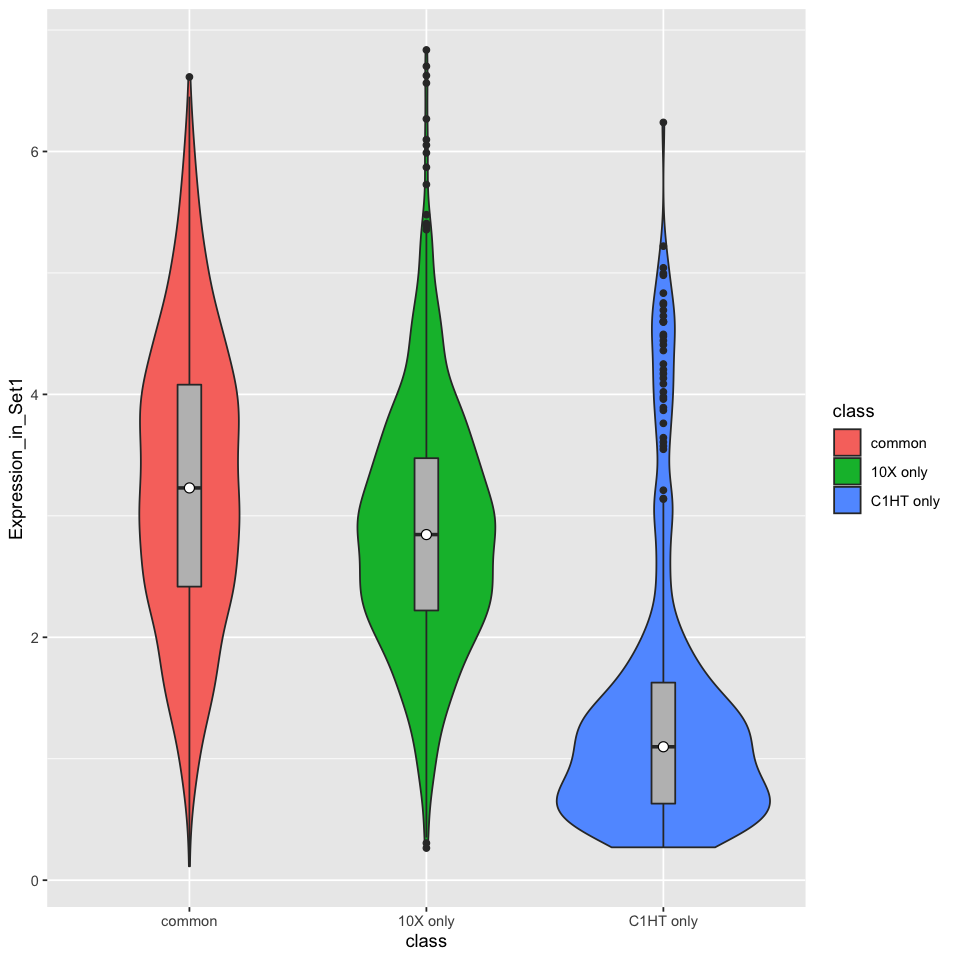

In [19]:
dat <- as.matrix(c(mean.common.markers.set2,
        mean.10x.only.markers,
        mean.c1.only.markers))
df <- data.frame(dat)
df$class <- c(rep('common', length = length(mean.common.markers.set2)),
              rep('10X only', length = length(mean.10x.only.markers)),
              rep('C1HT only', length = length(mean.c1.only.markers))
             )
colnames(df) <- c('Expression_in_Set1', 'class')
df <- transform(df, class = factor(class, levels = c('common','10X only','C1HT only')))

df$gene_name <- c(common.markers, tenx.only.markers, c1.only.markers)

g <- ggplot(df, aes(x = class, y = Expression_in_Set1, fill = class))
g <- g + geom_violin()
g <- g + geom_boxplot(width=.1,fill="gray",outer.colour=NA)
g <- g + stat_summary(fun.y=median,geom = "point", fill="white",shape=21,size=2.5)
plot(g)
print(median(df[df$class == 'common', 'Expression_in_Set1']))
print(median(df[df$class == '10X only', 'Expression_in_Set1']))
print(median(df[df$class == 'C1HT only', 'Expression_in_Set1']))
ggsave(g, file = './figures/Marker_Expression_in_Set1.eps', dpi = 300)

In [20]:
wilcox.test(mean.c1.only.markers, mean.10x.only.markers)
wilcox.test(mean.c1.only.markers, mean.common.markers.set2)


	Wilcoxon rank sum test with continuity correction

data:  mean.c1.only.markers and mean.10x.only.markers
W = 50359, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0



	Wilcoxon rank sum test with continuity correction

data:  mean.c1.only.markers and mean.common.markers.set2
W = 45215, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0


In [21]:
write.csv(df, file = './marker_expression_Set1_considerng_multi.csv')

Warning message:
“Ignoring unknown parameters: outer.colour”
Warning message:
“`fun.y` is deprecated. Use `fun` instead.”


[1] 1.402121
[1] 0.6964122
[1] 0.7052988


Saving 7 x 7 in image



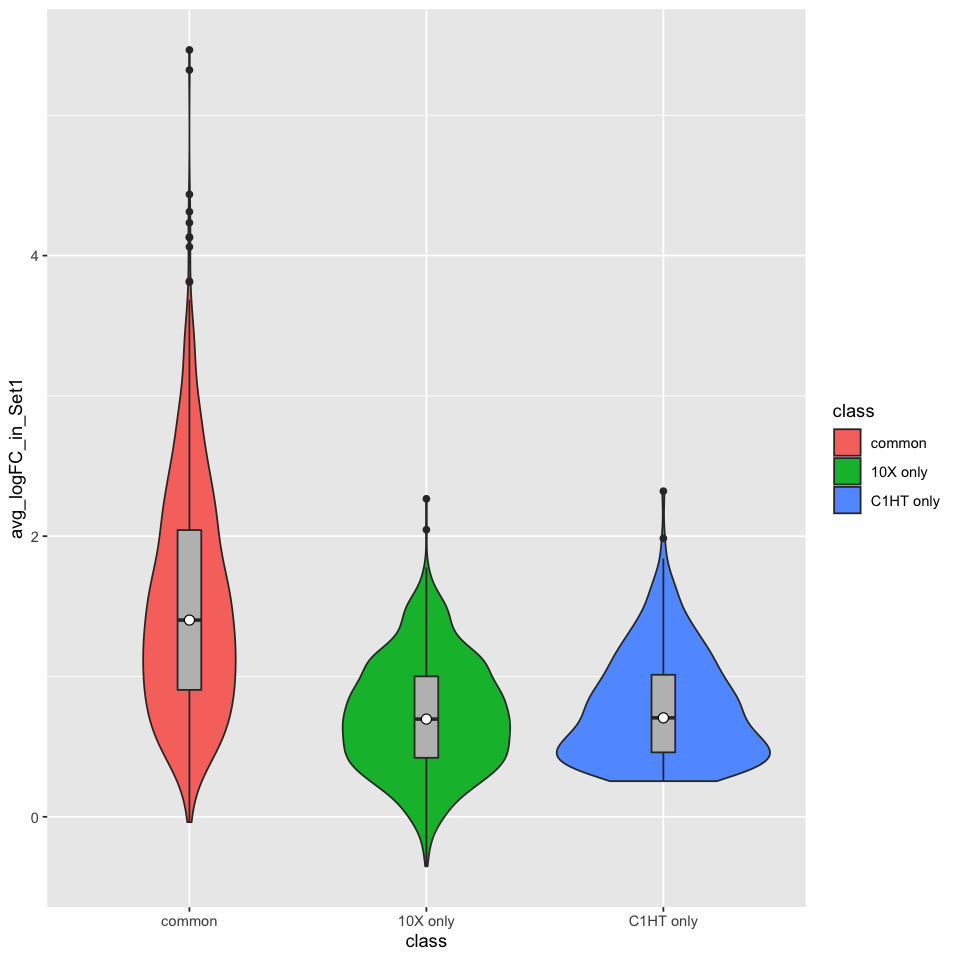

In [22]:
#Log Fold change
dat <- as.matrix(c(avg.logFC.common.markers.set2,
        avg.logFC.10x.only.markers,
        avg.logFC.c1.only.markers))
df <- data.frame(dat)
df$class <- c(rep('common', length = length(avg.logFC.common.markers.set2)),
              rep('10X only', length = length(avg.logFC.10x.only.markers)),
              rep('C1HT only', length = length(avg.logFC.c1.only.markers))
             )
colnames(df) <- c('avg_logFC_in_Set1', 'class')
df <- transform(df, class = factor(class, levels = c('common','10X only','C1HT only')))

df$gene_name <- c(common.markers, tenx.only.markers, c1.only.markers)

g <- ggplot(df, aes(x = class, y = avg_logFC_in_Set1, fill = class))
g <- g + geom_violin()
g <- g + geom_boxplot(width=.1,fill="gray",outer.colour=NA)
g <- g + stat_summary(fun.y=median,geom = "point", fill="white",shape=21,size=2.5)
plot(g)
print(median(df[df$class == 'common', 'avg_logFC_in_Set1']))
print(median(df[df$class == '10X only', 'avg_logFC_in_Set1']))
print(median(df[df$class == 'C1HT only', 'avg_logFC_in_Set1']))
ggsave(g, file = './figures/Marker_LogFC_in_Set1.eps', dpi = 300)

In [23]:
write.csv(df, file = './marker_logFC_Set1_considerng_multi.csv')

## Calculate average expression of marker genes in Set 2
For each marker gene, the average expression in Set 2 was calculated among the cells which belong to the clusters in which the gene detected as marker. 

In [24]:
temp <- c()
temp.diff <- c()
df <- all.markers.list[['Set 1']]
for (g in c1.only.markers){
    ident <- df[df$gene == g, 'cluster']
    seu.temp <- subset(obj.list[['Set 2']], ident = ident)
    seu.temp$temp <- 'temp'
    Idents(seu.temp) <- 'temp'
    expr <- AverageExpression(seu.temp, features = g, verbose = F)
    expr <- log1p(expr$SCT$temp)
    temp <- c(temp, expr)
    
    seu.temp <- subset(obj.list[['Set 2']], ident = ident, invert = T)
    seu.temp$temp <- 'temp'
    Idents(seu.temp) <- 'temp'
    expr.inv <- AverageExpression(seu.temp, features = g, verbose = F)
    expr.inv <- log1p(expr.inv$SCT$temp)
    
    diff <- expr - expr.inv
    temp.diff <- c(temp.diff, diff)
    
}
mean.c1.only.markers <- temp
head(mean.c1.only.markers)
avg.logFC.c1.only.markers <- temp.diff
head(avg.logFC.c1.only.markers)

[1] 2.53205778 0.09097178 2.02593232 2.08059581 1.06544026 0.66649814

[1] 0.24677198 0.08077752 0.22828970 0.18293943 0.21140393 0.27368035

In [25]:
temp <- c()
temp.diff <- c()
df <- all.markers.list[['Set 2']]
for (g in tenx.only.markers){
    ident <- df[df$gene == g, 'cluster']
    seu.temp <- subset(obj.list[['Set 2']], ident = ident)
    seu.temp$temp <- 'temp'
    Idents(seu.temp) <- 'temp'
    expr <- AverageExpression(seu.temp, features = g, verbose = F)
    expr <- log1p(expr$SCT$temp)
    temp <- c(temp, expr)
    
    seu.temp <- subset(obj.list[['Set 2']], ident = ident, invert = T)
    seu.temp$temp <- 'temp'
    Idents(seu.temp) <- 'temp'
    expr.inv <- AverageExpression(seu.temp, features = g, verbose = F)
    expr.inv <- log1p(expr.inv$SCT$temp)
    
    diff <- expr - expr.inv
    temp.diff <- c(temp.diff, diff)
}
mean.10x.only.markers <- temp
head(mean.10x.only.markers)
avg.logFC.10x.only.markers <- temp.diff
head(avg.logFC.10x.only.markers)

[1] 2.1954889 0.4081071 0.5452441 1.6728793 0.3795592 0.5966093

[1] 0.3818219 0.2659826 0.3457547 0.6598456 0.2868918 0.3597862

In [26]:
temp <- c()
temp.diff <- c()
df <- all.markers.list[['Set 2']]
for (g in common.markers){
    ident <- df[df$gene == g, 'cluster']
    seu.temp <- subset(obj.list[['Set 2']], ident = ident)
    seu.temp$temp <- 'temp'
    Idents(seu.temp) <- 'temp'
    expr <- AverageExpression(seu.temp, features = g, verbose = F)
    expr <- log1p(expr$SCT$temp)
    temp <- c(temp, expr)
    
    seu.temp <- subset(obj.list[['Set 2']], ident = ident, invert = T)
    seu.temp$temp <- 'temp'
    Idents(seu.temp) <- 'temp'
    expr.inv <- AverageExpression(seu.temp, features = g, verbose = F)
    expr.inv <- log1p(expr.inv$SCT$temp) 
    diff <- expr - expr.inv
    temp.diff <- c(temp.diff, diff)
    
}
mean.common.markers.set2 <- temp
head(mean.common.markers.set2)
avg.logFC.common.markers.set2 <- temp.diff
head(avg.logFC.common.markers.set2)

[1] 2.839969 2.255980 1.208794 3.277826 2.262929 2.557495

[1] 1.3735373 1.5996420 0.9286127 1.2910338 1.6950280 0.8148559

Warning message:
“Ignoring unknown parameters: outer.colour”
Warning message:
“`fun.y` is deprecated. Use `fun` instead.”


[1] 1.249906
[1] 1.061798
[1] 0.1455076


Saving 7 x 7 in image



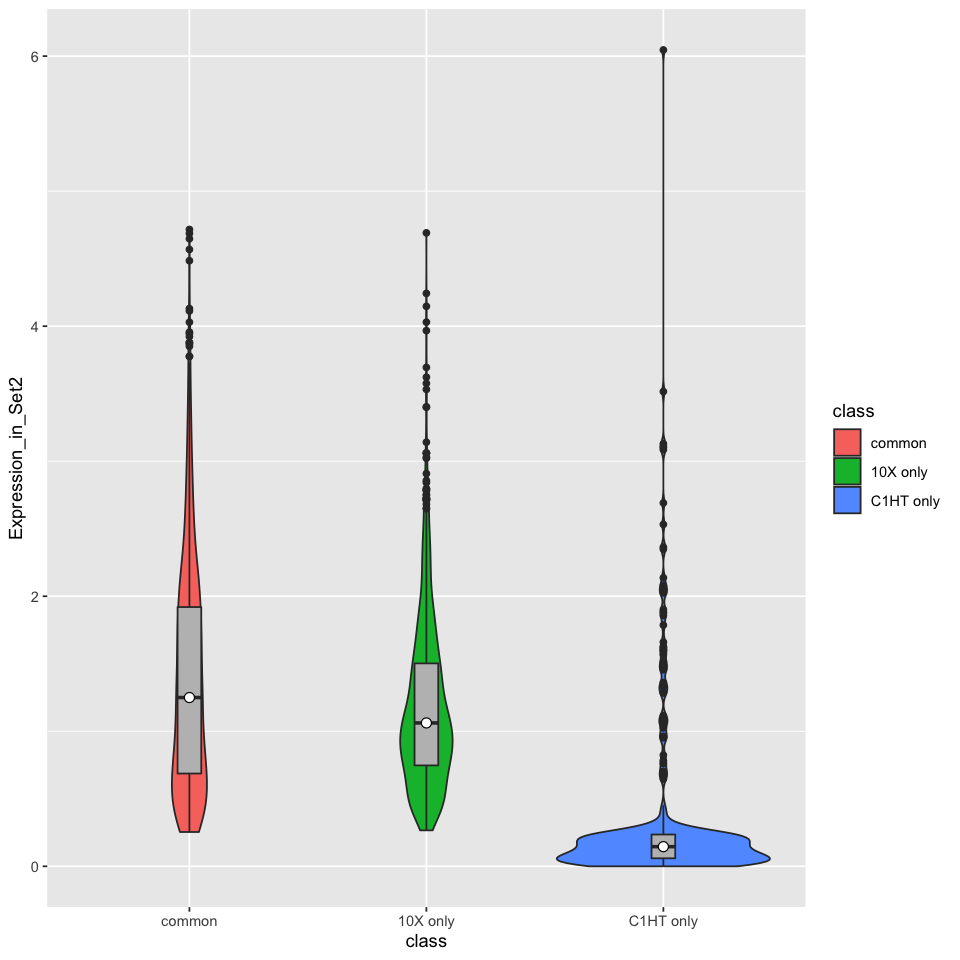

In [27]:
dat <- as.matrix(c(mean.common.markers.set2,
        mean.10x.only.markers,
        mean.c1.only.markers))
df <- data.frame(dat)
df$class <- c(rep('common', length = length(mean.common.markers.set2)),
              rep('10X only', length = length(mean.10x.only.markers)),
              rep('C1HT only', length = length(mean.c1.only.markers))
             )
colnames(df) <- c('Expression_in_Set2', 'class')
df <- transform(df, class = factor(class, levels = c('common','10X only','C1HT only')))

df$gene_name <- c(common.markers, tenx.only.markers, c1.only.markers)

g <- ggplot(df, aes(x = class, y = Expression_in_Set2, fill = class))
g <- g + geom_violin()
g <- g + geom_boxplot(width=.1,fill="gray",outer.colour=NA)
g <- g + stat_summary(fun.y=median,geom = "point", fill="white",shape=21,size=2.5)
plot(g)
print(median(df[df$class == 'common', 'Expression_in_Set2']))
print(median(df[df$class == '10X only', 'Expression_in_Set2']))
print(median(df[df$class == 'C1HT only', 'Expression_in_Set2']))

ggsave(g, file = './figures/Marker_Expression_in_Set2.eps', dpi = 300)

In [28]:
wilcox.test(mean.c1.only.markers, mean.10x.only.markers)
wilcox.test(mean.c1.only.markers, mean.common.markers.set2)


	Wilcoxon rank sum test with continuity correction

data:  mean.c1.only.markers and mean.10x.only.markers
W = 33140, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0



	Wilcoxon rank sum test with continuity correction

data:  mean.c1.only.markers and mean.common.markers.set2
W = 31050, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0


In [29]:
write.csv(df, file = './marker_expression_Set2_considerng_multi.csv')

Warning message:
“Ignoring unknown parameters: outer.colour”
Warning message:
“`fun.y` is deprecated. Use `fun` instead.”


[1] 0.6594782
[1] 0.4597054
[1] 0.107586


Saving 7 x 7 in image



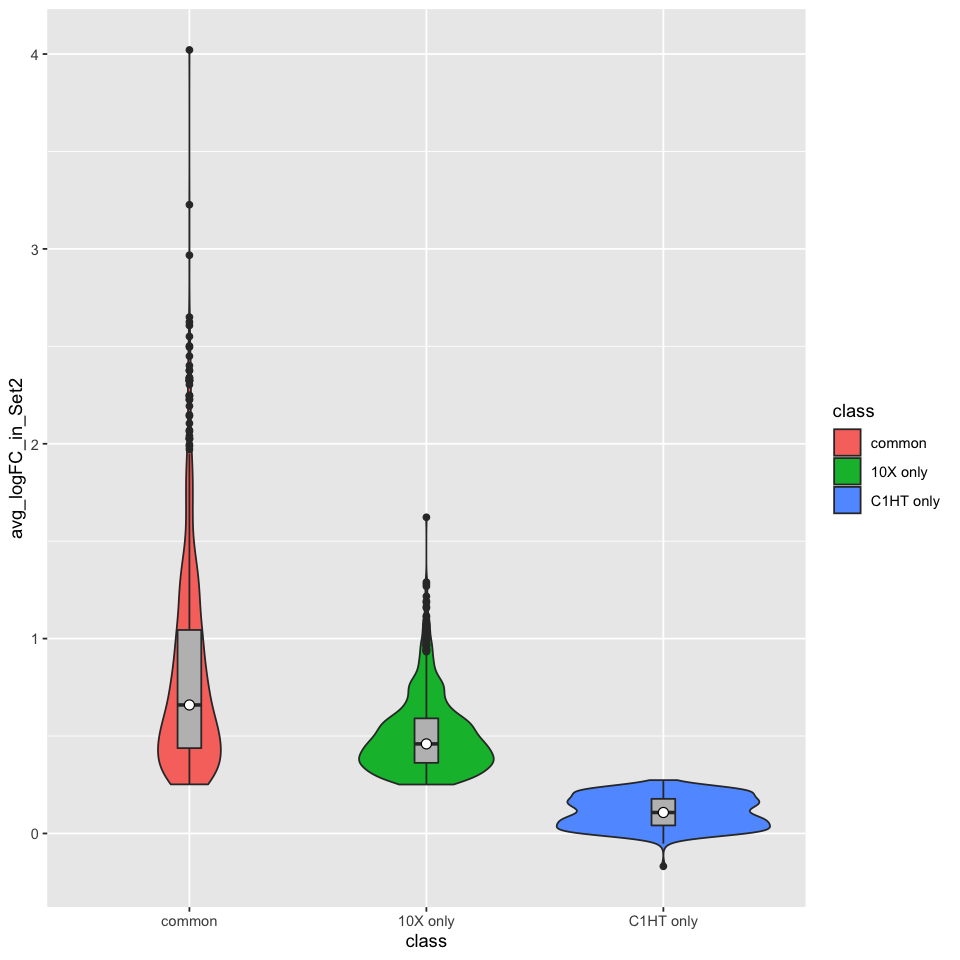

In [30]:
dat <- as.matrix(c(avg.logFC.common.markers.set2,
        avg.logFC.10x.only.markers,
        avg.logFC.c1.only.markers))
df <- data.frame(dat)
df$class <- c(rep('common', length = length(avg.logFC.common.markers.set2)),
              rep('10X only', length = length(avg.logFC.10x.only.markers)),
              rep('C1HT only', length = length(avg.logFC.c1.only.markers))
             )
colnames(df) <- c('avg_logFC_in_Set2', 'class')
df <- transform(df, class = factor(class, levels = c('common','10X only','C1HT only')))

df$gene_name <- c(common.markers, tenx.only.markers, c1.only.markers)

g <- ggplot(df, aes(x = class, y = avg_logFC_in_Set2, fill = class))
g <- g + geom_violin()
g <- g + geom_boxplot(width=.1,fill="gray",outer.colour=NA)
g <- g + stat_summary(fun.y=median,geom = "point", fill="white",shape=21,size=2.5)
plot(g)
print(median(df[df$class == 'common', 'avg_logFC_in_Set2']))
print(median(df[df$class == '10X only', 'avg_logFC_in_Set2']))
print(median(df[df$class == 'C1HT only', 'avg_logFC_in_Set2']))

ggsave(g, file = './figures/Marker_logFC_in_Set2.eps', dpi = 300)

In [31]:
write.csv(df, file = './marker_logFC_Set2_considerng_multi.csv')

## Calculate the proportion of cells expressing maker genes

In [32]:
count.table.set1 <- as.matrix(GetAssayData(obj.list[['Set 1']], slot = 'counts')) 
head(count.table.set1)
count.table.set2 <- as.matrix(GetAssayData(obj.list[['Set 2']], slot = 'counts')) 
head(count.table.set2)

,Set1_batch1_col1CATCTG,Set1_batch1_col1GACTCA,Set1_batch1_col1GCTGAT,Set1_batch1_col1GTCTAC,Set1_batch1_col1TAGTCG,Set1_batch1_col1TCTAGC,Set1_batch1_col1TGCATC,Set1_batch1_col2ACACTG,Set1_batch1_col2ATGACG,Set1_batch1_col2CGTCAT,⋯,Set1_batch4_col19CGTCAT,Set1_batch4_col19GCTGAT,Set1_batch4_col19GTCTAC,Set1_batch4_col20CACAGT,Set1_batch4_col20CATCTG,Set1_batch4_col20GAGCTA,Set1_batch4_col20GTGCAT,Set1_batch4_col20TACTGC,Set1_batch4_col20TCTCAG,Set1_batch4_col20TGCATC
128up,5,1,3,4,7,10,4,4,16,1,⋯,6,10,5,3,14,9,0,3,9,0
14-3-3epsilon,442,577,488,625,515,530,588,522,504,534,⋯,581,685,411,616,706,732,412,615,439,640
14-3-3zeta,99,157,181,117,138,120,125,144,135,81,⋯,201,174,101,126,135,106,125,108,131,164
140up,0,0,0,0,0,0,3,0,0,0,⋯,0,0,0,1,1,0,0,0,0,0
18SrRNA-Psi:CR41602,1034,1077,1118,1099,1197,1066,1111,1274,1437,1422,⋯,881,688,872,1064,715,1285,863,421,1042,584
18SrRNA-Psi:CR45861,1120,1142,1156,1140,1176,1122,1217,1319,1377,1359,⋯,1063,773,976,1073,551,1207,743,294,1020,356


,Set2_AAACCCACAAGTGATA,Set2_AAACCCACACTTGGCG,Set2_AAACCCATCCGTGTCT,Set2_AAACGAAAGAATCGTA,Set2_AAACGAAAGACTTCCA,Set2_AAACGAATCAAGCCTA,Set2_AAACGCTCACAGTATC,Set2_AAACGCTGTCGAACGA,Set2_AAACGCTTCCGATAGT,Set2_AAACGCTTCTGTCGCT,⋯,Set2_TGATGGTGTACGACTT,Set2_TGCGATAGTCAGGTGA,Set2_TGTGAGTAGATTGGGC,Set2_TTAATCCAGCCTTCTC,Set2_TTACGTTAGCGCGTTC,Set2_TTCACGCAGCAGGCAT,Set2_TTCCACGAGGTCCGAA,Set2_TTGGATGCATTCTTCA,Set2_TTGTTTGGTTCCTAAG,Set2_TTTCCTCCACGGTAGA
128up,0,0,0,0,1,0,1,0,1,0,⋯,3,1,0,0,3,0,2,0,1,0
14-3-3epsilon,43,36,26,47,55,50,33,38,40,44,⋯,25,36,55,22,43,47,49,39,23,39
14-3-3zeta,6,5,3,6,7,12,5,6,11,5,⋯,11,12,14,5,16,10,19,17,7,12
140up,0,0,0,1,1,0,0,0,0,0,⋯,0,1,0,2,0,0,0,0,1,0
18SrRNA-Psi:CR41602,57,86,48,47,46,127,46,88,86,104,⋯,70,92,113,164,52,157,80,100,68,116
18SrRNA-Psi:CR45861,40,53,27,36,24,79,36,85,56,54,⋯,54,70,92,104,46,104,48,65,70,108


In [33]:
temp.set1 <- c()
temp.set2 <- c()
df1 <- all.markers.list[['Set 1']]
# df2 <- all.markers.list[['Set 2']]
for (g in c1.only.markers){
    idents <- df1[df1$gene == g, 'cluster']
    cells <- WhichCells(obj.list[['Set 1']], idents = idents)
    n.cells <- length(cells)
    pct <- sum(count.table.set1[g,cells]>0)/n.cells
    temp.set1 <- c(temp.set1, pct)
    
    cells <- WhichCells(obj.list[['Set 2']], idents = idents)
    n.cells <- length(cells)
    pct <- sum(count.table.set2[g,cells]>0)/n.cells
    temp.set2 <- c(temp.set2, pct)
}
pct.c1.only.markers.set1 <- temp.set1
pct.c1.only.markers.set2 <- temp.set2
head(pct.c1.only.markers.set1)
head(pct.c1.only.markers.set2)

[1] 1.0000000 0.2213115 1.0000000 1.0000000 0.9918033 0.9099099

[1] 1.00000000 0.07671958 0.99158879 0.99431414 0.80291005 0.50035537

In [34]:
temp.set1 <- c()
temp.set2 <- c()
# df1 <- all.markers.list[['Set 1']]
df2 <- all.markers.list[['Set 2']]
for (g in tenx.only.markers){
    idents <- df2[df2$gene == g, 'cluster']
    
    cells <- WhichCells(obj.list[['Set 1']], idents = idents)
    n.cells <- length(cells)
    pct <- sum(count.table.set1[g,cells]>0)/n.cells
    temp.set1 <- c(temp.set1, pct)
    
    cells <- WhichCells(obj.list[['Set 2']], idents = idents)
    n.cells <- length(cells)
    pct <- sum(count.table.set2[g,cells]>0)/n.cells
    temp.set2 <- c(temp.set2, pct)
}
pct.10x.only.markers.set1 <- temp.set1
pct.10x.only.markers.set2 <- temp.set2
head(pct.10x.only.markers.set1)
head(pct.10x.only.markers.set2)

[1] 1.0000000 0.3852459 0.4966887 0.8636364 0.2459016 0.4638554

[1] 0.9910814 0.3214286 0.3607521 0.7989766 0.2116402 0.3333333

In [35]:
temp.set1 <- c()
temp.set2 <- c()
# df1 <- all.markers.list[['Set 1']]
df2 <- all.markers.list[['Set 2']]
for (g in common.markers){
    idents <- df2[df2$gene == g, 'cluster']
    
    cells <- WhichCells(obj.list[['Set 1']], idents = idents)
    
    n.cells <- length(cells)
    pct <- sum(count.table.set1[g,cells]>0)/n.cells
    temp.set1 <- c(temp.set1, pct)
    
    cells <- WhichCells(obj.list[['Set 2']], idents = idents)
    n.cells <- length(cells)
    pct <- sum(count.table.set2[g,cells]>0)/n.cells
    temp.set2 <- c(temp.set2, pct)
}
pct.common.markers.set1 <- temp.set1
pct.common.markers.set2 <- temp.set2
head(pct.common.markers.set1)
head(pct.common.markers.set2)

[1] 1.0000000 0.9537954 0.8661972 1.0000000 0.9793388 1.0000000

[1] 0.9975217 0.8653367 0.7472119 0.9777572 0.9082792 1.0000000

Warning message:
“Ignoring unknown parameters: outer.colour”
Warning message:
“`fun.y` is deprecated. Use `fun` instead.”


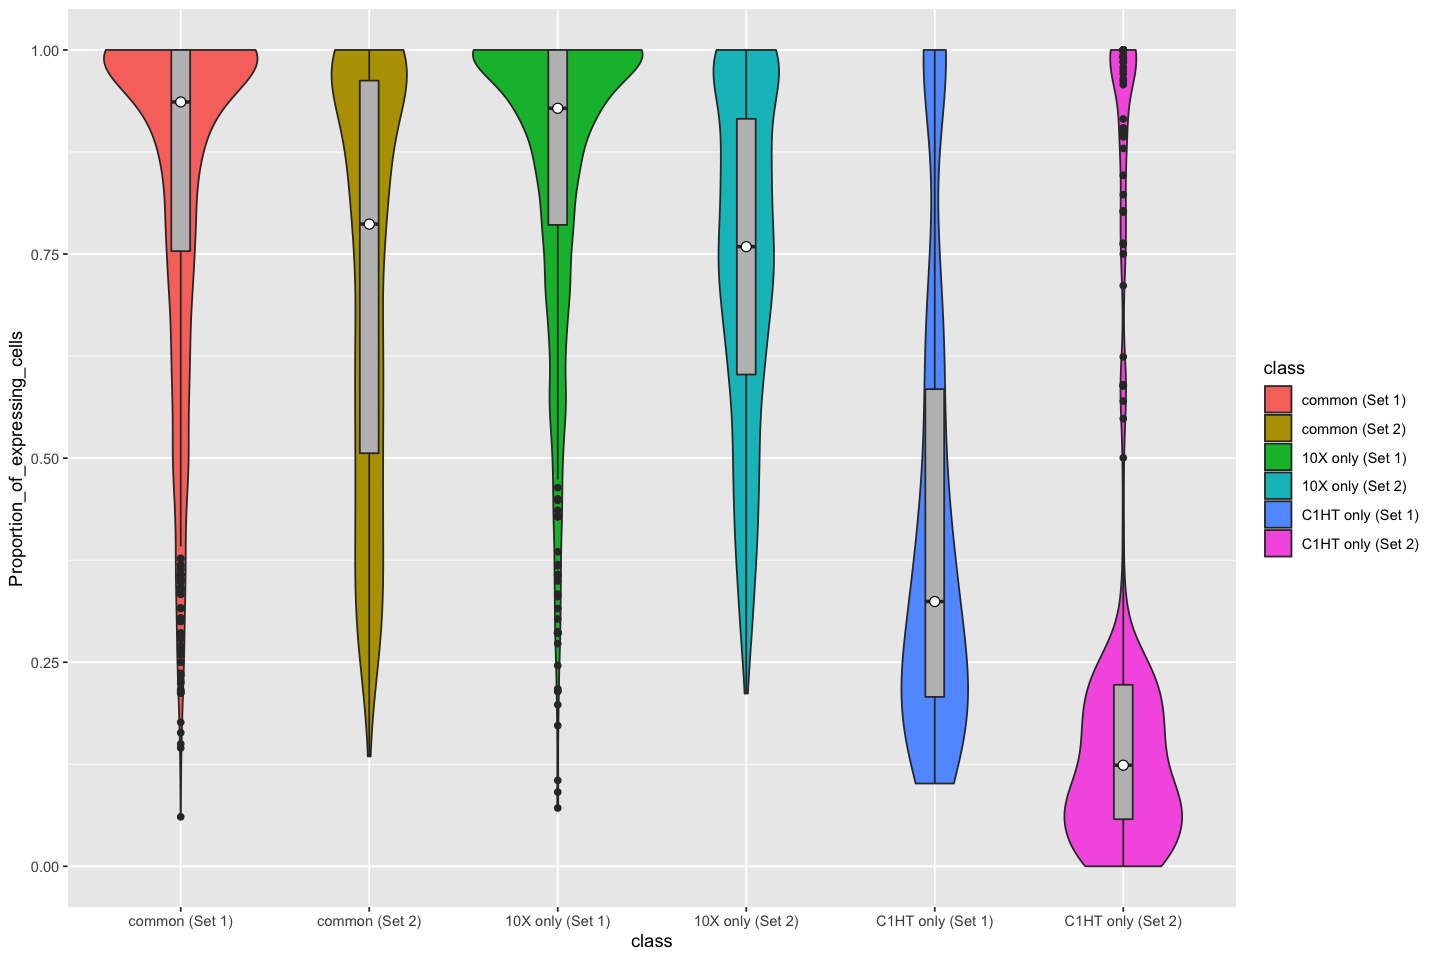

In [36]:
dat <- as.matrix(c(pct.common.markers.set1,
        pct.common.markers.set2,
        pct.10x.only.markers.set1,
        pct.10x.only.markers.set2,
        pct.c1.only.markers.set1,
        pct.c1.only.markers.set2
                  ))
df <- data.frame(dat)
df$class <- c(rep('common (Set 1)', length = length(pct.common.markers.set1)),
              rep('common (Set 2)', length = length(pct.common.markers.set2)),
              rep('10X only (Set 1)', length = length(pct.10x.only.markers.set1)),
              rep('10X only (Set 2)', length = length(pct.10x.only.markers.set2)),
              rep('C1HT only (Set 1)', length = length(pct.c1.only.markers.set1)),
              rep('C1HT only (Set 2)', length = length(pct.c1.only.markers.set2))
             )
colnames(df) <- c('Proportion_of_expressing_cells', 'class')
df <- transform(df, class = factor(class, levels = c('common (Set 1)',
                                                     'common (Set 2)',
                                                     '10X only (Set 1)',
                                                     '10X only (Set 2)',
                                                     'C1HT only (Set 1)',
                                                     'C1HT only (Set 2)')))
options(repr.plot.width=12, repr.plot.height=8)
g <- ggplot(df, aes(x = class, y = Proportion_of_expressing_cells, fill = class))
g <- g + geom_violin()
g <- g + geom_boxplot(width=.1,fill="gray",outer.colour=NA)
g <- g + stat_summary(fun.y=median,geom = "point", fill="white",shape=21,size=2.5)
plot(g)

ggsave(g, file = './figures/proportion_of_expressing_cells.eps', dpi = 300, width = 12, height = 8)

In [37]:
write.csv(df, file = './marker_proportion_expressing_cells_considerng_multi.csv')

In [38]:
.Machine$double.eps

[1] 2.220446e-16